Empecemos probando un **Árbol de Decisión**, con nuestro famoso dataset de **Iris** 😀

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier # Importamos

dt = DecisionTreeClassifier() # 1.- Creamos el modelo
dt

DecisionTreeClassifier()

In [4]:
# 2.- entrenamos modelo
dt.fit(X, y) # con 150 patrones

DecisionTreeClassifier()

In [5]:
# 3.- Predicciones
y_pred = dt.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Evaluamos con Accuracy

In [6]:
from sklearn.metrics import accuracy_score

# Calculamos el accuracy
acc = accuracy_score(y, y_pred)
acc

0.9933333333333333

Mejoraremos esto al separar los datos en Train y Test

In [7]:
X = iris.data[:, :] # petal length and width
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=32, stratify=y)

In [9]:
dt2 = DecisionTreeClassifier(max_depth=2) # 1.- Creamos el modelo
dt2.fit(X_train, y_train) # 2.- Entrenamos

DecisionTreeClassifier(max_depth=2)

In [10]:
# 3.- Predicciones
y_test_pred = dt2.predict(X_test)
y_train_pred = dt2.predict(X_train)
y_test_pred

array([2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 2, 1, 1])

In [11]:
test_acc = accuracy_score(y_test_pred, y_test)
train_acc = accuracy_score(y_train_pred, y_train)
print('% de aciertos sobre el set de prueba: ', test_acc)
print('% de aciertos sobre el set de entrenamiento: ', train_acc)

% de aciertos sobre el set de prueba:  0.9466666666666667
% de aciertos sobre el set de entrenamiento:  0.96


### Visualizando el Árbol de Decisión

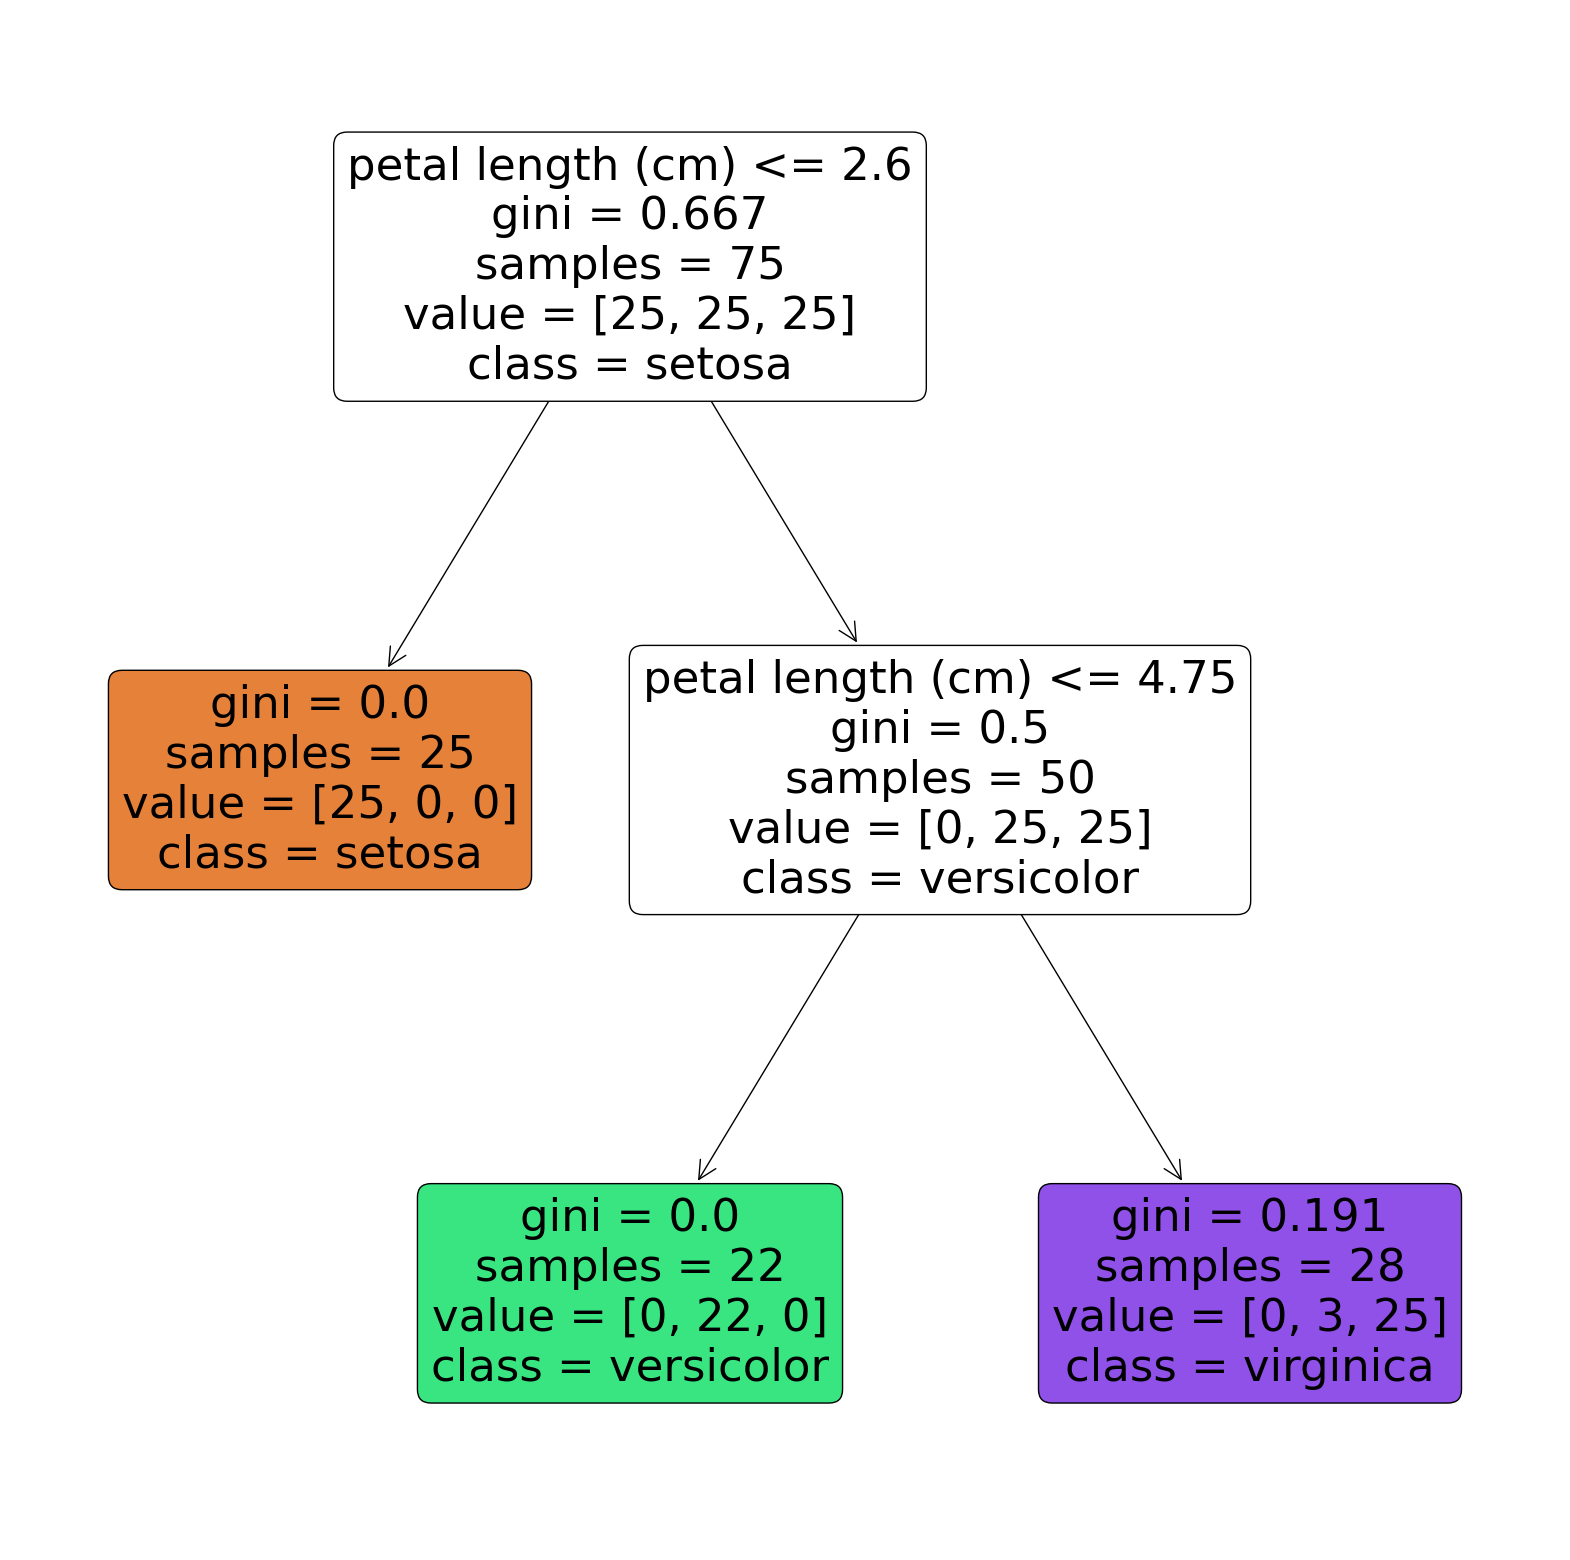

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree


plt.figure(figsize=(20, 20))
_=tree.plot_tree(dt2, feature_names= iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

### Variables de Importancia

In [13]:
fig = plt.figure(figsize=(8,5))
importances = dt2.feature_importances_
columns = iris.feature_names
importances

array([0., 0., 1., 0.])

<Figure size 800x500 with 0 Axes>

Text(0, 0.5, 'Importance')

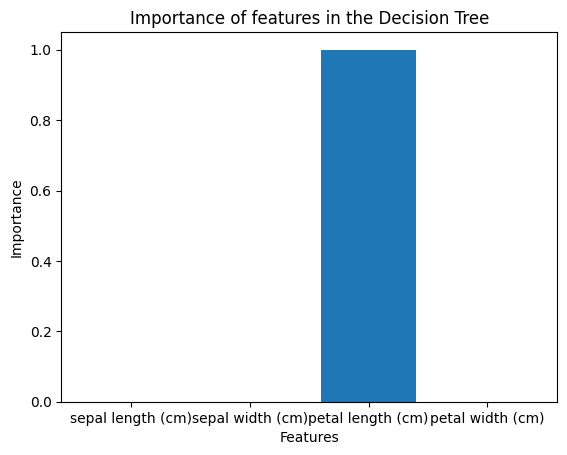

In [14]:
plt.bar(columns, importances)
plt.xlabel('Features')
plt.title('Importance of features in the Decision Tree')
plt.ylabel('Importance')